In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [67]:
df = pd.read_csv('./Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [69]:
df = df.drop(columns = ['Id'])

In [70]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
def min_max(data,column):
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    data[column] = round(data[column],2)

In [72]:
min_max(df,'SepalLengthCm')
min_max(df,'SepalWidthCm')
min_max(df,'PetalLengthCm')
min_max(df,'SepalWidthCm')

In [73]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.22,0.62,0.07,0.2,Iris-setosa
1,0.17,0.42,0.07,0.2,Iris-setosa
2,0.11,0.50,0.05,0.2,Iris-setosa
3,0.08,0.46,0.08,0.2,Iris-setosa
4,0.19,0.67,0.07,0.2,Iris-setosa


In [74]:
X = df.drop(columns = ['Species'])
y = df['Species']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

In [77]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred = model.predict(X_test)

In [79]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'micro')
recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(accuracy, precision, recall)

[[ 9  0  0]
 [ 0 13  1]
 [ 0  2  5]]
0.9 0.9 0.9


<Axes: >

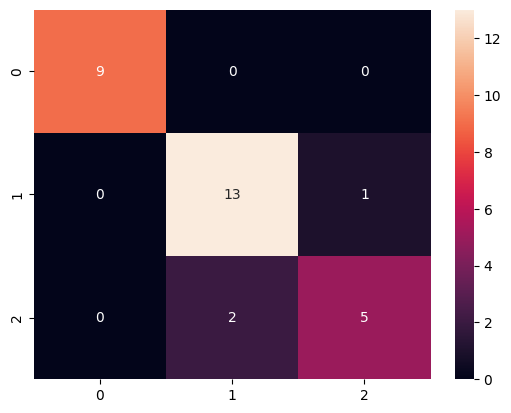

In [80]:
sb.heatmap(cm, annot = True)